In [4]:
import pandas as pd

df = pd.read_csv("/Users/kaiarupniak/Desktop/data-mining-project/heart_disease_health_indicators_BRFSS2015.csv")
print(df.shape)
print(df.columns)
df.head()


(253680, 22)
Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


<Axes: >

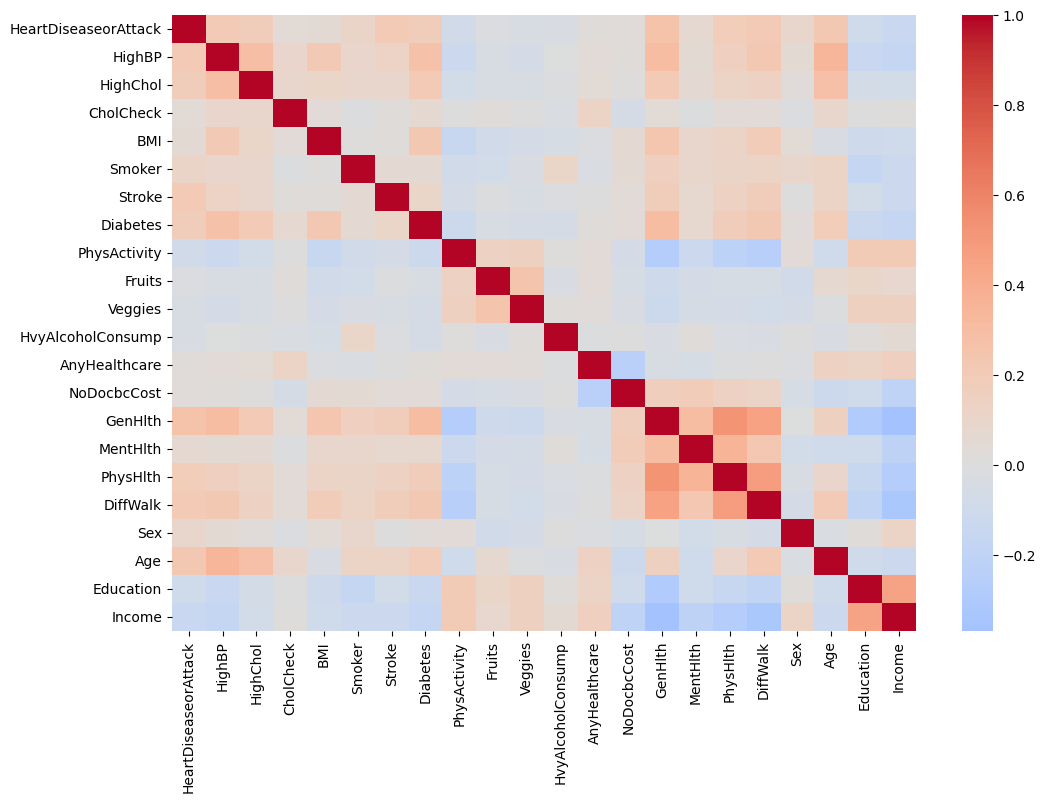

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)


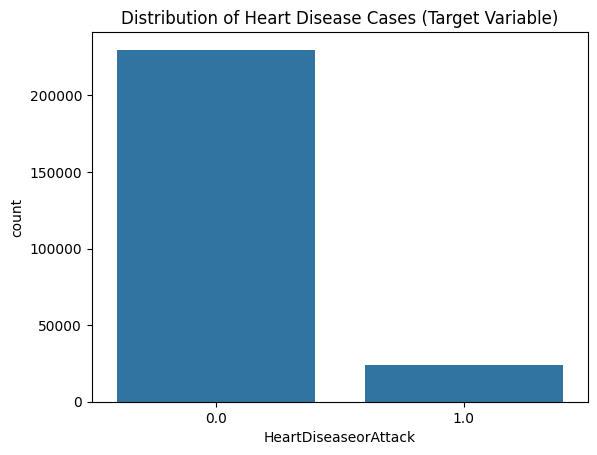

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
sns.countplot(x='HeartDiseaseorAttack', data=df)
plt.title("Distribution of Heart Disease Cases (Target Variable)")
plt.show()


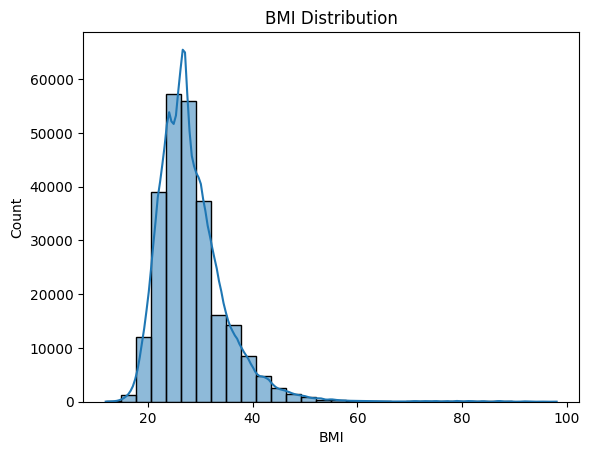

In [ ]:
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title("BMI Distribution")
plt.show()


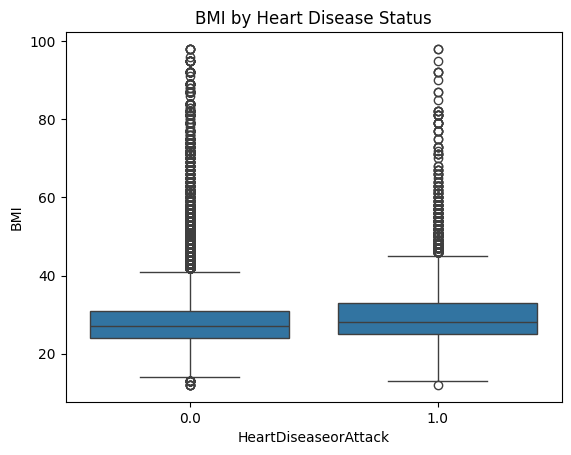

In [ ]:
sns.boxplot(x='HeartDiseaseorAttack', y='BMI', data=df)
plt.title("BMI by Heart Disease Status")
plt.show()


/var/folders/_4/lw9kfy912msdrz1lnqwxr5c80000gn/T/ipykernel_35091/3977790885.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='HeartDiseaseorAttack', data=df, ci=None)


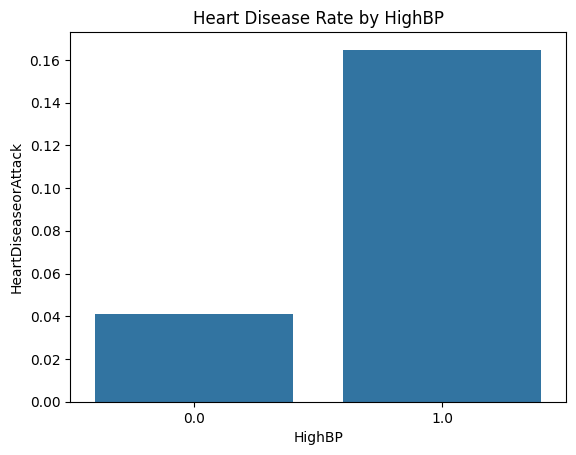

/var/folders/_4/lw9kfy912msdrz1lnqwxr5c80000gn/T/ipykernel_35091/3977790885.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='HeartDiseaseorAttack', data=df, ci=None)


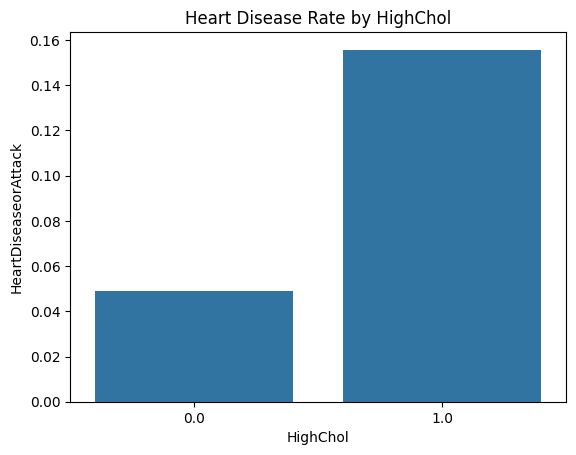

/var/folders/_4/lw9kfy912msdrz1lnqwxr5c80000gn/T/ipykernel_35091/3977790885.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='HeartDiseaseorAttack', data=df, ci=None)


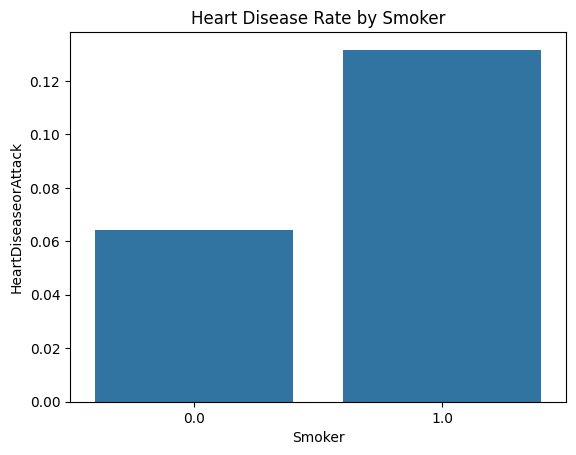

/var/folders/_4/lw9kfy912msdrz1lnqwxr5c80000gn/T/ipykernel_35091/3977790885.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='HeartDiseaseorAttack', data=df, ci=None)


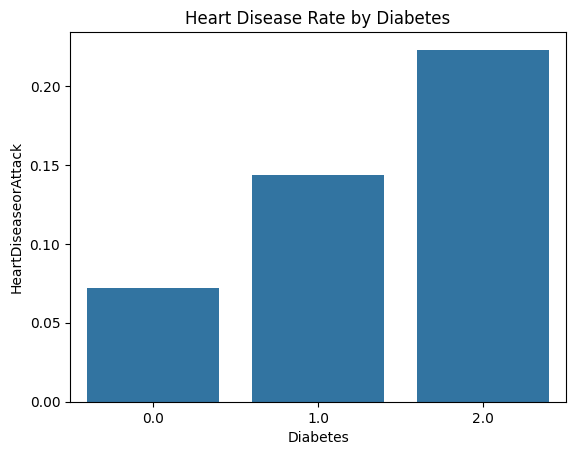

/var/folders/_4/lw9kfy912msdrz1lnqwxr5c80000gn/T/ipykernel_35091/3977790885.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='HeartDiseaseorAttack', data=df, ci=None)


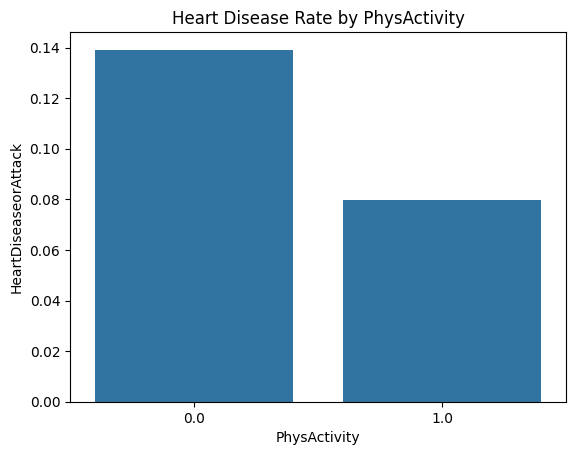

In [ ]:
categorical_features = ['HighBP', 'HighChol', 'Smoker', 'Diabetes', 'PhysActivity']

for col in categorical_features:
    sns.barplot(x=col, y='HeartDiseaseorAttack', data=df, ci=None)
    plt.title(f"Heart Disease Rate by {col}")
    plt.show()


LOGISTIC REGRESSION

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = df.drop("HeartDiseaseorAttack", axis=1)
y = df["HeartDiseaseorAttack"]

# standaryzacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [7]:
importance = pd.DataFrame({
    'feature': X.columns,
    'coef': logreg.coef_[0]
}).sort_values(by='coef', ascending=False)

print(importance.head(10))


      feature      coef
18        Age  0.838039
13    GenHlth  0.538071
17        Sex  0.407828
1    HighChol  0.314241
0      HighBP  0.279183
5      Stroke  0.226926
4      Smoker  0.198478
6    Diabetes  0.120635
16   DiffWalk  0.115421
2   CholCheck  0.105089


In [8]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     69007
         1.0       0.25      0.79      0.38      7097

    accuracy                           0.75     76104
   macro avg       0.61      0.77      0.61     76104
weighted avg       0.90      0.75      0.80     76104

ROC-AUC: 0.8458219801178487


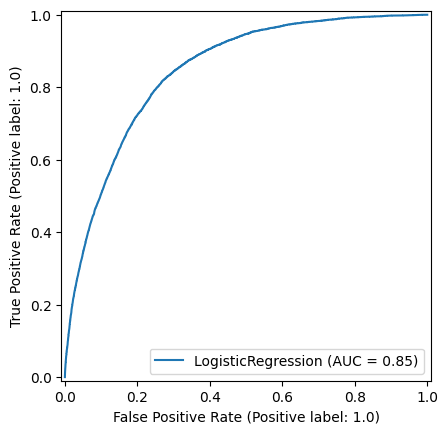

In [10]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logreg, X_test, y_test)


DECISION TREE

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Create and train the model
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# Predictions
y_pred_tree = tree.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred_tree))
print("ROC-AUC:", roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     69007
         1.0       0.56      0.07      0.12      7097

    accuracy                           0.91     76104
   macro avg       0.74      0.53      0.54     76104
weighted avg       0.88      0.91      0.87     76104

ROC-AUC: 0.8198126969857165


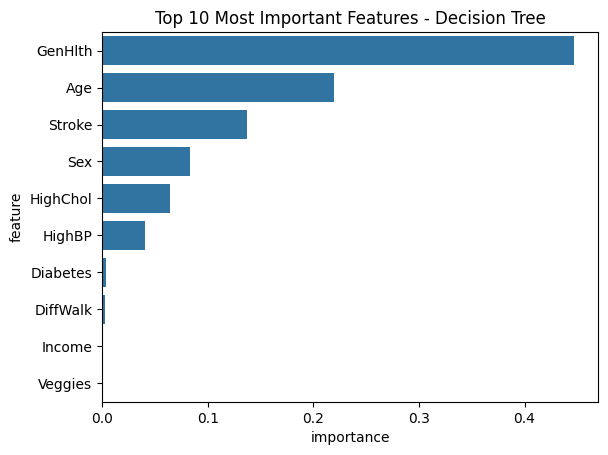

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

importances = pd.DataFrame({
    'feature': X.columns,
    'importance': tree.feature_importances_
}).sort_values(by='importance', ascending=False)

sns.barplot(x='importance', y='feature', data=importances.head(10))
plt.title("Top 10 Most Important Features - Decision Tree")
plt.show()


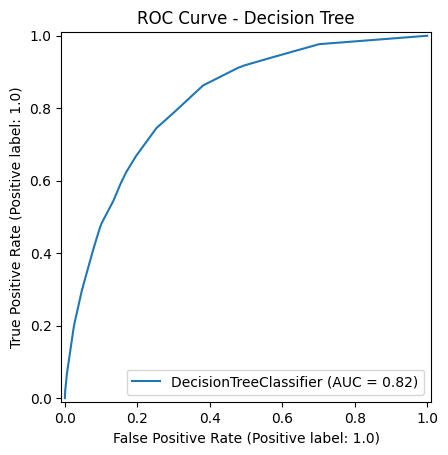

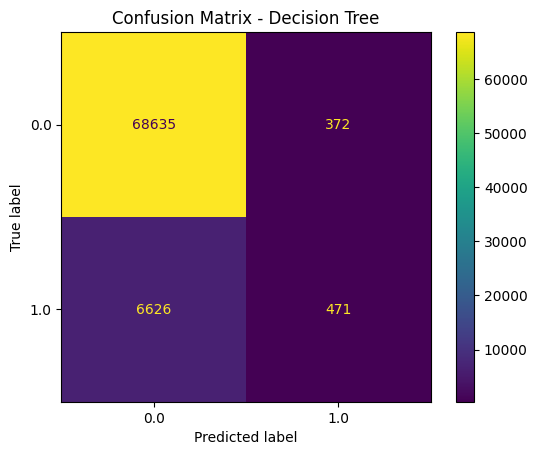

In [13]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

RocCurveDisplay.from_estimator(tree, X_test, y_test)
plt.title("ROC Curve - Decision Tree")
plt.show()

ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test)
plt.title("Confusion Matrix - Decision Tree")
plt.show()


RANDOM FOREST

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     69007
         1.0       0.44      0.11      0.18      7097

    accuracy                           0.90     76104
   macro avg       0.68      0.55      0.56     76104
weighted avg       0.87      0.90      0.88     76104

ROC-AUC: 0.8191745026575475


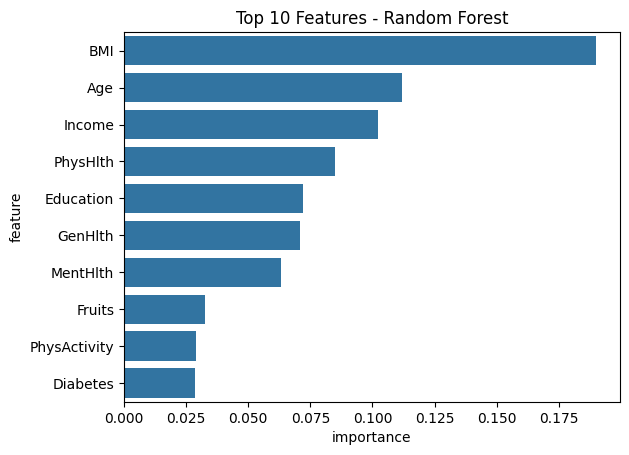

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

# Feature importance
importances_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

sns.barplot(x='importance', y='feature', data=importances_rf.head(10))
plt.title("Top 10 Features - Random Forest")
plt.show()


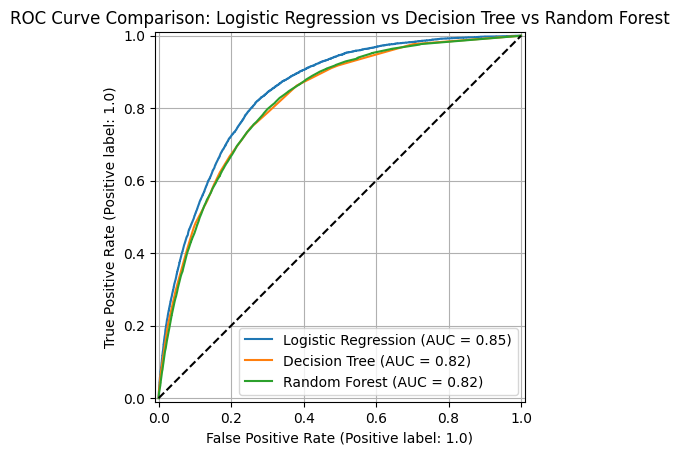

In [17]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# ROC curves
disp1 = RocCurveDisplay.from_estimator(logreg, X_test, y_test, name="Logistic Regression")
disp2 = RocCurveDisplay.from_estimator(tree, X_test, y_test, name="Decision Tree", ax=disp1.ax_)
disp3 = RocCurveDisplay.from_estimator(rf, X_test, y_test, name="Random Forest", ax=disp1.ax_)

# Add random baseline
plt.plot([0, 1], [0, 1], 'k--')

# Styling
plt.title("ROC Curve Comparison: Logistic Regression vs Decision Tree vs Random Forest")
plt.legend()
plt.grid(True)
plt.show()



NEURAL NETWORK

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import pandas as pd

# 1) Pipeline: StandardScaler + MLP (to bardzo ważne dla NN)
mlp = make_pipeline(
    StandardScaler(with_mean=False),  # with_mean=False gdy X jest DataFrame z wieloma 0/1
    MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation='relu',
        solver='adam',
        alpha=1e-4,            # regularyzacja L2
        learning_rate_init=1e-3,
        max_iter=200,
        early_stopping=True,   # walidacja i zatrzymanie, gdy brak poprawy
        n_iter_no_change=10,
        validation_fraction=0.1,
        random_state=42
    )
)

# 2) Trening
mlp.fit(X_train, y_train)

# 3) Predykcje i metryki
y_pred_mlp = mlp.predict(X_test)
y_proba_mlp = mlp.predict_proba(X_test)[:, 1]

print("=== Neural Network (MLP) ===")
print(classification_report(y_test, y_pred_mlp))
auc_mlp = roc_auc_score(y_test, y_proba_mlp)
print("ROC-AUC:", auc_mlp)


=== Neural Network (MLP) ===
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     69007
         1.0       0.59      0.07      0.12      7097

    accuracy                           0.91     76104
   macro avg       0.75      0.53      0.54     76104
weighted avg       0.88      0.91      0.87     76104

ROC-AUC: 0.8447910397451801


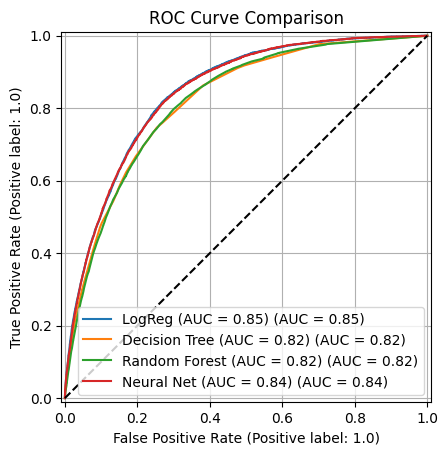

In [19]:
disp = RocCurveDisplay.from_estimator(logreg, X_test, y_test, name=f"LogReg (AUC = {roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]):.2f})")
RocCurveDisplay.from_estimator(tree, X_test, y_test, name=f"Decision Tree (AUC = {roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]):.2f})", ax=disp.ax_)
RocCurveDisplay.from_estimator(rf,   X_test, y_test, name=f"Random Forest (AUC = {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]):.2f})", ax=disp.ax_)
RocCurveDisplay.from_estimator(mlp,  X_test, y_test, name=f"Neural Net (AUC = {roc_auc_score(y_test, mlp.predict_proba(X_test)[:,1]):.2f})", ax=disp.ax_)

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
results_auc = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "Neural Net (MLP)"],
    "ROC-AUC": [
        roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]),
        auc_mlp
    ]
}).sort_values("ROC-AUC", ascending=False)
results_auc


,Model,ROC-AUC
0,Logistic Regression,0.845822
3,Neural Net (MLP),0.844791
1,Decision Tree,0.819813
2,Random Forest,0.819175
